In [19]:
#Sckit-learn Preprocessing and Model Selection
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#ML Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor

#Evaluation & Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np

In [20]:
# Locating Data
from pathlib import Path

# Use a raw string or Path to avoid Python interpreting backslashes as escape sequences
data_folder = Path(r"C:\Users\cmhub\Desktop\network-anomaly-detector-starter\data\MachineLearningCSV\MachineLearningCVE")

# Check existence
print(data_folder.exists())

# Get all the csv files in the folder
csv_files = list(data_folder.glob("*.csv"))

print(f"Found {len(csv_files)} CSV files in the folder.")
for f in csv_files:
    print("-", f.name)


True
Found 8 CSV files in the folder.
- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
- Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
- Friday-WorkingHours-Morning.pcap_ISCX.csv
- Monday-WorkingHours.pcap_ISCX.csv
- Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
- Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
- Tuesday-WorkingHours.pcap_ISCX.csv
- Wednesday-workingHours.pcap_ISCX.csv


In [21]:
#Loads each file into a dataframe and stores them in a list
df_lists = []

for file in csv_files:
    # file is a Path object; use file.name to get the filename
    day_name = file.name.split('-')[0]
    temp_df = pd.read_csv(file)
    temp_df['Day'] = day_name  # Add a new column to identify the day
    df_lists.append(temp_df)

# Concatenate once after loading all files
full_df = pd.concat(df_lists, ignore_index=True)
print(f"Combined DataFrame shape: {full_df.shape}")


Combined DataFrame shape: (2830743, 80)


In [22]:
#Clean Column Names & Lables
full_df.columns = full_df.columns.str.strip()
full_df['Label'] = (full_df['Label'] != 'BENIGN').astype(int)
print(full_df['Label'].value_counts())

Label
0    2273097
1     557646
Name: count, dtype: int64


In [23]:
#Exploring the Data
print(full_df.info())
print(full_df.describe())
print(full_df['Day'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

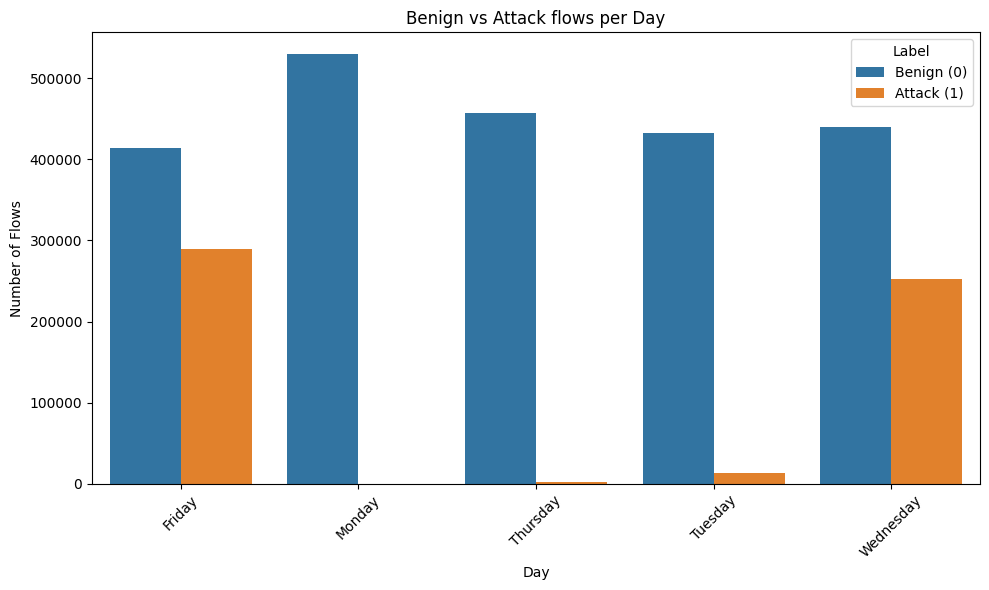

In [24]:
#Visualizing the Data

plt.figure(figsize=(10,6))
sns.countplot(data=full_df, x="Day", hue="Label")
plt.title('Benign vs Attack flows per Day')
plt.ylabel('Number of Flows')
plt.xlabel('Day')
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['Benign (0)', 'Attack (1)'])
plt.tight_layout()
plt.show()


In [26]:
#Combinding work into a combined DataFrame
data_folder = data_folder / "CICIDS2017_combined.csv"
full_df.to_csv(data_folder, index=False)
